# Analyzing used cars database
## Over 370,000 used cars scraped from Ebay Kleinanzeigen

## Importing packages and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Analysis

In [2]:
#Import the cleaned dataset into a dataframe
data = pd.read_csv('Data/autos_cleaned.csv')

In [3]:
data.head(2)

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,zip_code,last_seen
0,2016-03-24,Golf_3_1.6,480.0,test,NaN,1993.0,manuell,NaN,golf,150000,0,benzin,Volkswagen,NaN,2016-03-24,70435,2016-04-07
1,2016-03-24,A5_Sportback_2.7_Tdi,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5,diesel,Audi,ja,2016-03-24,66954,2016-04-07


## Distribution of car brands advertised on ebay kleinanzeigen

In [4]:
#distribution of car brands advertised on ebay kleinanzeigen
brand_group_count = data.groupby(by='brand').size().sort_values(ascending=False) 
# brand_group_count

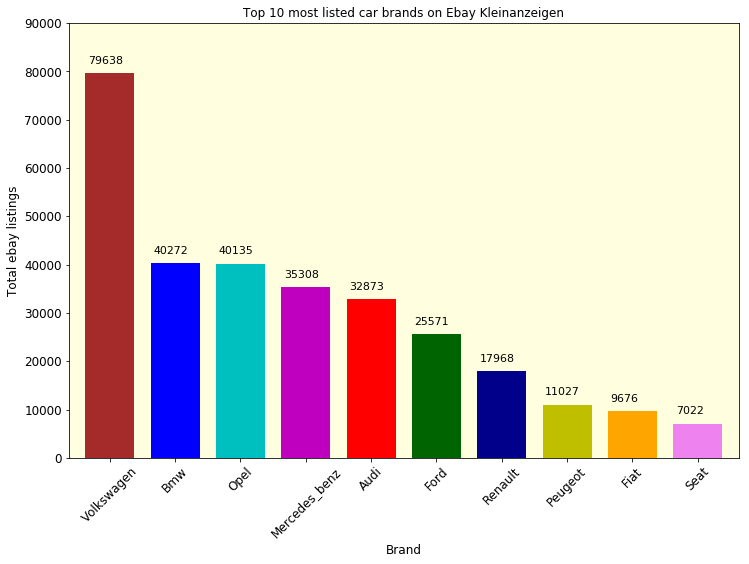

In [24]:
ax = brand_group_count.nlargest(10).plot.bar(
    color=['brown','b','c','m','r','DarkGreen','DarkBlue','y','orange','violet'],
    zorder=200,
    fontsize=12,
    title='Top 10 most listed car brands on Ebay Kleinanzeigen',
    figsize=(12, 8),
    width=0.75,
    ylim=(0,90000),
    rot=45
)

ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Total ebay listings', size=12)
ax.set_facecolor('#FFFFE0')

# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+2000, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=0)
    
plt.show()

In [6]:
#print top 10 brands from most advertized to least advertized
top_10_brands = data.groupby(['brand']).size().nlargest(10).index
top_10_brands                            

Index(['Volkswagen', 'Bmw', 'Opel', 'Mercedes_benz', 'Audi', 'Ford', 'Renault',
       'Peugeot', 'Fiat', 'Seat'],
      dtype='object', name='brand')

In [7]:
brand_and_gearbox_group = data.groupby(['brand','gearbox']).size().unstack().loc[top_10_brands]
# brand_and_gearbox_group

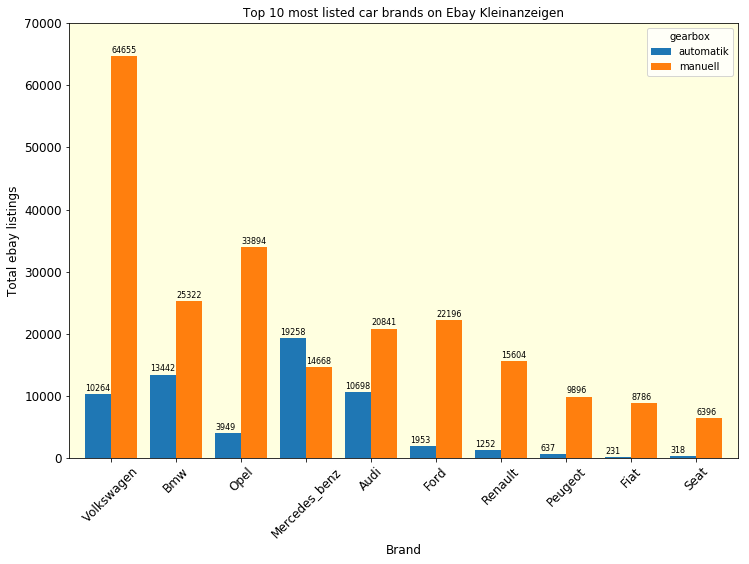

In [30]:
ax = brand_and_gearbox_group.plot.bar(
    zorder=0,
    fontsize=12,
    title='Top 10 most listed car brands on Ebay Kleinanzeigen',
    figsize=(12, 8),
    width=0.8,
    ylim=(0,70000),
    rot=45
    )

ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Total ebay listings', size=12)
ax.set_facecolor('#FFFFE0')

# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+500, \
            str(round((i.get_height()), 2)), fontsize=8, color='black',
                rotation=0)

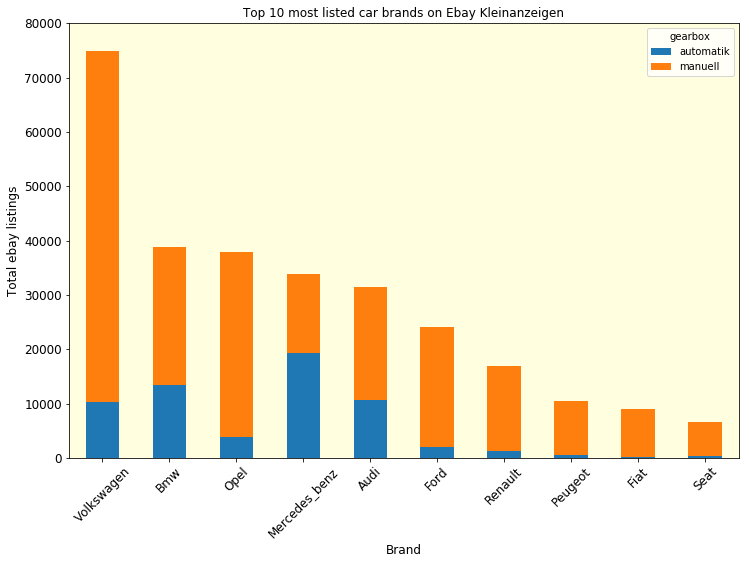

In [26]:
ax = brand_and_gearbox_group.plot.bar(
    zorder=0,
    fontsize=12,
    title='Top 10 most listed car brands on Ebay Kleinanzeigen',
    figsize=(12, 8),
    width=0.50,
    ylim=(0,80000),
    rot=45,
    stacked=True
)

ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Total ebay listings', size=12)
ax.set_facecolor('#FFFFE0')

## Average asking price per car brand

In [10]:
#Average asking price per brand
brand_group_mean_price = data.groupby('brand').mean()['price'].sort_values(ascending=False).round(0).astype(int)
# brand_group_mean_price

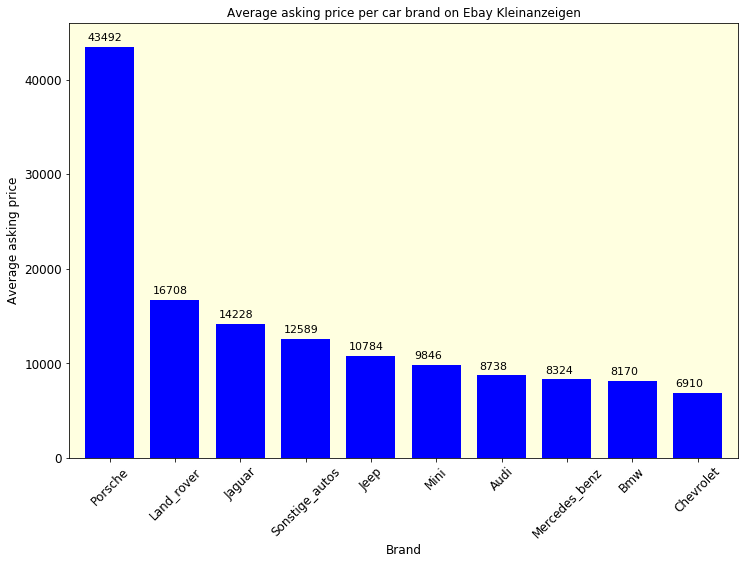

In [27]:
ax = brand_group_mean_price.nlargest(10).plot.bar(
    color='b',
    zorder=0,
    fontsize=12,
    title='Average asking price per car brand on Ebay Kleinanzeigen',
    figsize=(12, 8),
    width=0.75,
    ylim=(0,46000),
    rot=45
)

ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Average asking price', size=12)
ax.set_facecolor('#FFFFE0')

# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+600, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=0)
    
plt.show()

In [12]:
top_10_expensive = data.groupby('brand').mean()['price'].nlargest(10).index

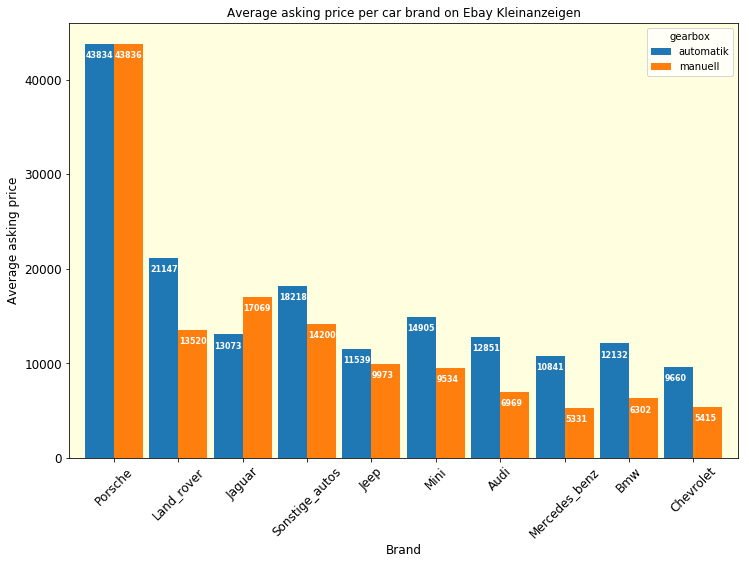

In [28]:
brand_and_gearbox_group_mean_price = data.groupby(['brand', 'gearbox']).mean()['price'].unstack().round(0).astype(int).loc[top_10_expensive]
ax= brand_and_gearbox_group_mean_price.plot.bar(
    zorder=0,
    fontsize=12,
    title='Average asking price per car brand on Ebay Kleinanzeigen',
    figsize=(12, 8),
    width=0.9,
    ylim=(0,46000),
    rot=45
)

ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Average asking price', size=12)
ax.set_facecolor('#FFFFE0')

# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x()+0.01, i.get_height()-1500,
            str(round((i.get_height()), 2)), fontsize=8, color='white', weight='bold',
                rotation=0)

plt.show()

In [15]:
data.sample(10)

,date_crawled,name,price,abtest,vehicle_type,registration_year,gearbox,powerps,model,kilometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,zip_code,last_seen
317122,2016-03-24,Audi_A4_Avant_3.0_TDI_quattro_S_tronic_Sline_P...,19999.0,control,kombi,2010.0,automatik,239.0,a4,150000,9,diesel,Audi,nein,2016-03-24,56235,2016-04-02
190320,2016-04-06,BMW_320i,4450.0,test,limousine,2002.0,manuell,170.0,3er,150000,5,benzin,Bmw,nein,2016-04-06,58507,2016-04-06
189269,2016-03-12,Renault_Megane_1.6_Coupe_Cabriolet_Privile,6340.0,test,cabrio,2008.0,manuell,111.0,megane,90000,1,benzin,Renault,nein,2016-03-12,16321,2016-04-07
360422,2016-03-31,Ford_escort,250.0,control,kombi,1994.0,manuell,90.0,escort,150000,12,NaN,Ford,ja,2016-03-31,71334,2016-04-06
244075,2016-03-11,Volkswagen_Passat,2300.0,test,kombi,1997.0,automatik,101.0,passat,150000,10,benzin,Volkswagen,nein,2016-03-11,74821,2016-03-22
119126,2016-03-10,Suzuki_Alto_1.1_Automatik_Club,3750.0,test,kleinwagen,2005.0,automatik,63.0,andere,30000,5,benzin,Suzuki,nein,2016-03-10,9241,2016-04-06
114425,2016-03-11,Volkswagen_Golf_2.0_TDI_BlueMotion_Technology_...,13900.0,control,limousine,2013.0,manuell,150.0,golf,125000,4,diesel,Volkswagen,nein,2016-03-11,73485,2016-04-07
136311,2016-04-05,Ford_Focus_3Tuerer_ohne_Tuev,500.0,control,kleinwagen,1999.0,manuell,NaN,focus,150000,2,NaN,Ford,nein,2016-04-05,8412,2016-04-07
366811,2016-03-24,renault_BJ_1996,0.0,control,NaN,2000.0,manuell,NaN,megane,150000,3,benzin,Renault,nein,2016-03-24,39261,2016-04-02
115482,2016-03-26,Mini_Cooper_Top_Zustand_2.Hand,4800.0,control,coupe,2002.0,manuell,116.0,cooper,150000,2,benzin,Mini,nein,2016-03-26,76437,2016-04-06


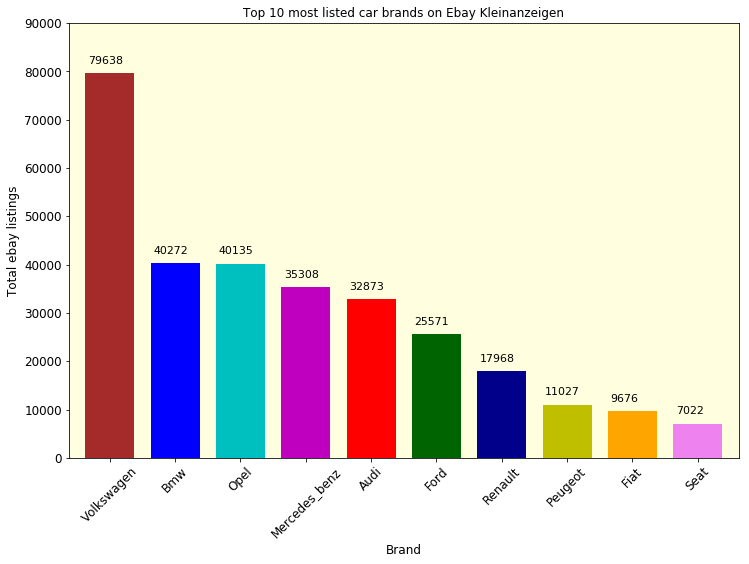

In [31]:
ax = brand_group_count.nlargest(10).plot.bar(
    color=['brown','b','c','m','r','DarkGreen','DarkBlue','y','orange','violet'],
    zorder=200,
    fontsize=12,
    title='Top 10 most listed car brands on Ebay Kleinanzeigen',
    figsize=(12, 8),
    width=0.75,
    ylim=(0,90000),
    rot=45
)

ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Total ebay listings', size=12)
ax.set_facecolor('#FFFFE0')

# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+2000, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=0)
    
plt.show()

## Plotted with matplotlib

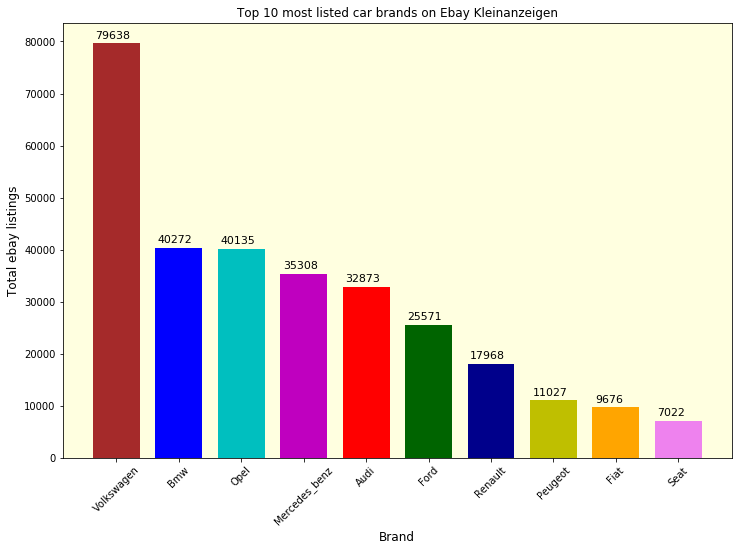

In [113]:
bar_heights = np.arange(10)+1
bar_positions = brand_group_count.nlargest(10)
tick_positions = range(1,11)

fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(bar_heights,
       bar_positions, width=0.75,
       color=['brown','b','c','m','r','DarkGreen','DarkBlue','y','orange','violet'])
       
ax.set_xticks(tick_positions)
ax.set_xticklabels(bar_positions.index, rotation=45)
ax.set_title('Top 10 most listed car brands on Ebay Kleinanzeigen')
ax.set_facecolor('#FFFFE0')  
ax.set_xlabel('Brand', size=12)
ax.set_ylabel('Total ebay listings', size=12)


# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x()+.04, i.get_height()+1000, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',
                rotation=0)
    

## Plotted with seaborn

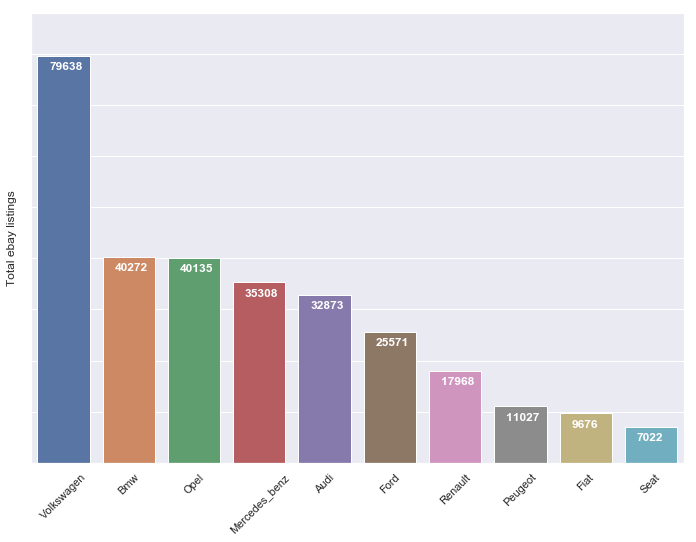

In [174]:
ax = sns.barplot(x=brand_group_count.nlargest(10).index, y=brand_group_count.nlargest(10))

ax.set_xlabel('', size=12)
ax.set_ylabel('Total ebay listings', size=12)
ax.set_xticklabels(bar_positions.index, rotation=45)
sns.set_style("darkgrid")
ax.set_ylim(0,88000)
ax.set_yticklabels("")
sns.set(rc={'figure.figsize':(11.7,8.27)})

# set bar lables above each bar
for i in ax.patches:
    ax.text(i.get_x()+0.18, i.get_height()-2800, \
            str(round((int(i.get_height())), 2)), fontsize=12, color='white', weight='bold',
                rotation=0)

plt.show()

## More visualizations

In [178]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    print(i, c)

0 gearbox
1 model
2 brand
3 vehicleType
4 fuelType
5 notRepairedDamage


In [185]:
categories = ['gearbox', 'model', 'brand', 'vehicleType', 'fuelType', 'notRepairedDamage']

for i, c in enumerate(categories):
    v = data[c].unique()
    
    g = data.groupby(by=c)[c].count().sort_values(ascending=False)
    r = range(min(len(v), 5))

    print( g.head())
    plt.figure(figsize=(150,150))
    plt.bar(r, g.head()) 
    #plt.xticks(r, v)
    plt.xticks(r, g.index)
    plt.show()

gearbox
manuell      274208
automatik     77105
Name: gearbox, dtype: int64


ValueError: shape mismatch: objects cannot be broadcast to a single shape